# Часть 2: Многоклассовая логистическая регрессия на датасете Iris

В этой части мы применим многоклассовую логистическую регрессию к датасету Iris и визуализируем результаты.

## 1. Загрузка и подготовка данных Iris

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

iris = load_iris()
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

print("Первые 5 строк датасета Iris:")
print(df_iris.head())
print(f"\nИмена классов: {iris.target_names}")
print(f"Уникальные значения цели: {df_iris['target'].unique()}")

## 2. Многоклассовая логистическая регрессия

In [ ]:
X_iris = df_iris[['petal length (cm)', 'petal width (cm)']]
y_iris = df_iris['target']

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris)

print(f"Размер обучающей выборки: {X_train_iris.shape}, тестовой: {X_test_iris.shape}")

log_reg_multi = OneVsRestClassifier(LogisticRegression(solver='lbfgs', random_state=42, max_iter=200))
log_reg_multi.fit(X_train_iris, y_train_iris)

y_pred_iris = log_reg_multi.predict(X_test_iris)

accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"\nТочность многоклассовой логистической регрессии на Iris (petal features): {accuracy_iris:.4f}")

## 3. Визуализация решения на плоскости 'petal length - petal width'

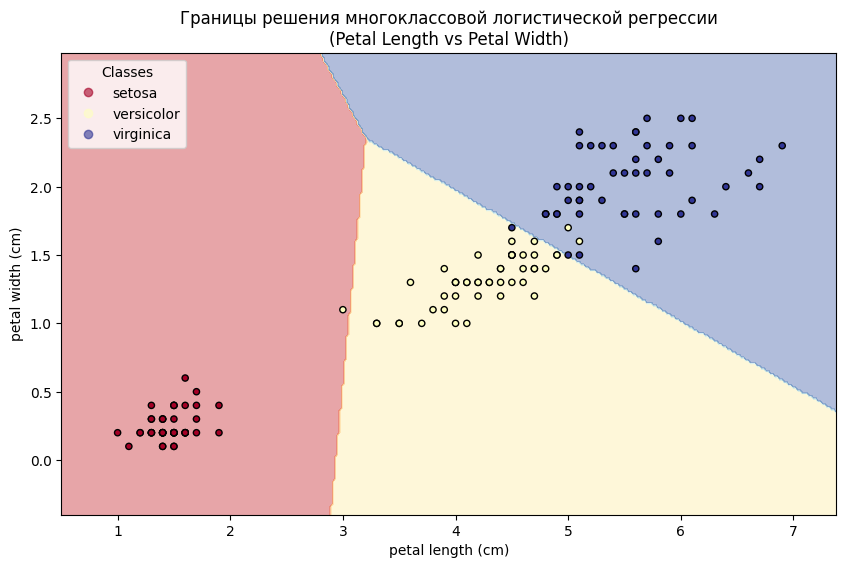

In [ ]:
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    mesh_data = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=X.columns)
    Z = model.predict(mesh_data)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.RdYlBu)
    
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1]) 
    plt.title(title)
    
    handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
    legend_labels = [f'{iris.target_names[i]}' for i in np.unique(y)]
    plt.legend(handles, legend_labels, title="Classes")

    plt.show()

plot_decision_boundary(X_iris, y_iris, log_reg_multi, 
                         'Границы решения многоклассовой логистической регрессии\n(Petal Length vs Petal Width)')

## Завершение Части 2